# Project 1: Exploring Weather Trends
This is the first project of the Data Analyst Udacity Nanodegre program. In this project, we will analyze local and global temperature data and compare the temperature trends where you live to overall global temperature trends.

## Project Instructions
Your goal will be to create a visualization and prepare a write up describing the similarities and differences between global temperature trends and temperature trends in the closest big city to where you live. To do this, you’ll follow the steps below:

- Extract the data from the database. There's a workspace in the previous section that is connected to a database. You’ll need to export the temperature data for the world as well as for the closest big city to where you live. You can find a list of cities and countries in the city_list table. To interact with the database, you'll need to write a SQL query.
- Write a SQL query to extract the city level data. Export to CSV.
Write a SQL query to extract the global data. Export to CSV.
Open up the CSV in whatever tool you feel most comfortable using. We suggest using Excel or Google sheets, but you are welcome to use another tool, such as Python or R.
- Create a line chart that compares your city’s temperatures with the global temperatures. Make sure to plot the moving average rather than the yearly averages in order to smooth out the lines, making trends more observable (the last concept in the previous lesson goes over how to do this in a spreadsheet).
- Make observations about the similarities and differences between the world averages and your city’s averages, as well as overall trends. Here are some questions to get you started.
  - Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?
  - “How do the changes in your city’s temperatures over time compare to the changes in the global average?”
  -What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?

## Extract the data from the database
The SQL query to get the data from the database was:
```
WITH tabla1 AS (SELECT c.year AS year, c.city AS city, 
c.country AS country, c.avg_temp AS city_avg_temp, 
g.avg_temp AS global_avg_temp
FROM city_data c
JOIN global_data g
ON c.year = g.year
WHERE c.city = 'Madrid' AND c.country = 'Spain')
SELECT year, city, city_avg_temp, global_avg_temp
FROM tabla1
ORDER BY 1
```

Although I live in Vigo, Spain, the closest city to Vigo in the database is Madrid, so I used Madrid as the city in Spain to do my analysis and compare it to the global average temperature.

Just below you can see a screenshot of the query on the Udacity platform.





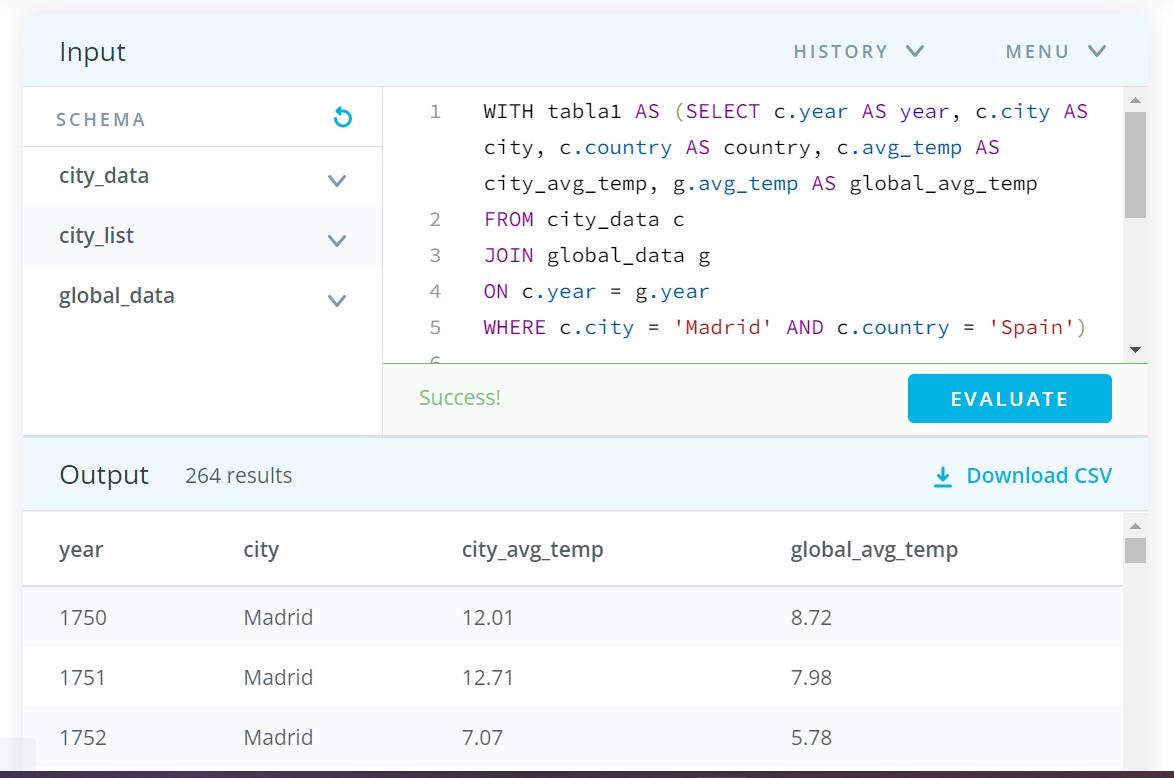

In [28]:
# Import the package 
import pandas as pd

# To plot the data, we are going to use plotnine package to use ggplot insted of matplotlib. 
# The ggplot package was created in R language.
from plotnine import ggplot, aes, geom_line, geom_point, ggtitle, labs, stat_smooth, theme, geom_hline
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

## Read the csv file
The SQL query was saved as madrid_and_global_temp.csv so we will open the file with read_csv pandas method.

In [2]:
data = pd.read_csv('madrid_and_global_temp.csv')
data.head()

,year,city,city_avg_temp,global_avg_temp
0,1750,Madrid,12.01,8.72
1,1751,Madrid,12.71,7.98
2,1752,Madrid,7.07,5.78
3,1753,Madrid,11.47,8.39
4,1754,Madrid,11.49,8.47


## Explore the data
First, we are going to explore the data to see if it is necessary to clean it and see some basic characteristics of the data.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             264 non-null    int64  
 1   city             264 non-null    object 
 2   city_avg_temp    264 non-null    float64
 3   global_avg_temp  264 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.4+ KB



We have 264 rows and 6 columns in the data frame

## Let's check if there are NA in the data to clean the data

In [4]:
data.isna().sum()

year               0
city               0
city_avg_temp      0
global_avg_temp    0
dtype: int64

There are no NaN's in the data frame.

In [24]:
data.city.value_counts()

Madrid    264
Name: city, dtype: int64

## Let's Look at some basic statistics

In [5]:
data.describe()

,year,city_avg_temp,global_avg_temp
count,264.000000,264.000000,264.000000
mean,1881.500000,11.450682,8.359394
std,76.354437,0.630496,0.575184
min,1750.000000,7.070000,5.780000
25%,1815.750000,11.117500,8.077500
50%,1881.500000,11.415000,8.365000
75%,1947.250000,11.800000,8.700000
max,2013.000000,13.280000,9.730000


The mean of the average temperature of Madrid (11.45 ºC) is higher than the global one (8.36 ºC) as well as the standard deviation, so Madrid is warmer on average than the global one. The minimum value in the entire series of the average temperature of Madrid is 7.07 degrees centigrade; which represents a decrease of more than 38% with respect to the average. We can see a similar big difference between the average and the minimum temperature in global_avg_temp, this could be an abnormally cold year (outlier) for some climatic reason.

Let's see in what year these low temperatures occurred.


In [6]:
data[data['city_avg_temp']== 7.070000]

,year,city,city_avg_temp,global_avg_temp
2,1752,Madrid,7.07,5.78


We see that the minimum temperature in Madrid and in the global temperature took place in the same year (1752) so it could be an abnormally cold year.

In [7]:
# Let's rename the columns in the data frame

data = data.rename(columns={'city_avg_temp': 'madrid_avg_temperature', 'global_avg_temp': 'global_avg_temperature'})

In [8]:
data.head()

,year,city,madrid_avg_temperature,global_avg_temperature
0,1750,Madrid,12.01,8.72
1,1751,Madrid,12.71,7.98
2,1752,Madrid,7.07,5.78
3,1753,Madrid,11.47,8.39
4,1754,Madrid,11.49,8.47


In [9]:
# We are going to create two news columns to capture the differences
# among the actual year and the previous one.

data['diff_madrid_temp']= data.madrid_avg_temperature.diff()
data['diff_global_temp']= data.global_avg_temperature.diff()
data.head()

,year,city,madrid_avg_temperature,global_avg_temperature,diff_madrid_temp,diff_global_temp
0,1750,Madrid,12.01,8.72,NaN,NaN
1,1751,Madrid,12.71,7.98,0.70,-0.74
2,1752,Madrid,7.07,5.78,-5.64,-2.20
3,1753,Madrid,11.47,8.39,4.40,2.61
4,1754,Madrid,11.49,8.47,0.02,0.08


## Make a plot
The idea is to see the differences in temperatures among years in Madrid and in global average temperature.

In [10]:
# This function makes a line plot with the year in the x-axis
# and temperature or any variable in the y-axis.
def diff_plot(data, title, temp_variable, y= "Temperature Differences (ºC)"):
  '''
  This function make a plot using two arguments
  arg:
    data (The dataframe that you want to use
    title (principal title of the plot)
    Temp_variable (Chose one temperature variable in dataframe)
    y axis label, It should be a string
  '''
  print(ggplot(data, aes(x="year", y=temp_variable)) 
        + ggtitle(title)
        +labs (y= y, x = "Year (1750 - 2013)")
        + geom_line()
        + theme(figure_size=(10, 5)))

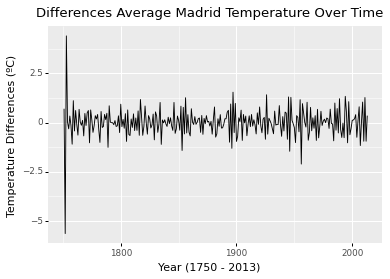

In [11]:
# Let's make the plot to see the differences in the average Madrid temperature 
# among one year and the previous one.

diff_plot(data,'Differences Average Madrid Temperature Over Time', 'diff_madrid_temp')

Plotting the annual temperature differences, we see that the differences change from positive to negative around zero over the years.
In the case of Madrid, volatility is more constant over time.
An obvious curiosity is that more volatility is observed in global temperature differences in the first hundred years and then it has less volatility and remains similar. That's perhaps because the global data has increased in the number of countries over time, but we can't be sure about that. To try to see this, we are going to do another SQL query on the Udacity platform. 

## Extract more data from the dataBase
The idea is to make a query to get from the city_data how the numbers of countries increase or not their number over time.

The SQL query to get the data from the database was:
```
SELECT year,COUNT(DISTINCT country) AS number_countries
FROM city_data
GROUP BY year
ORDER BY year
```

And saved the query as number_countries.csv

In [13]:
data_countries = pd.read_csv('number_countries.csv')
data_countries.head()

,year,number_countries
0,1743,38
1,1744,38
2,1745,38
3,1746,38
4,1747,38


In [23]:
data_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   year              271 non-null    int64
 1   number_countries  271 non-null    int64
dtypes: int64(2)
memory usage: 4.4 KB


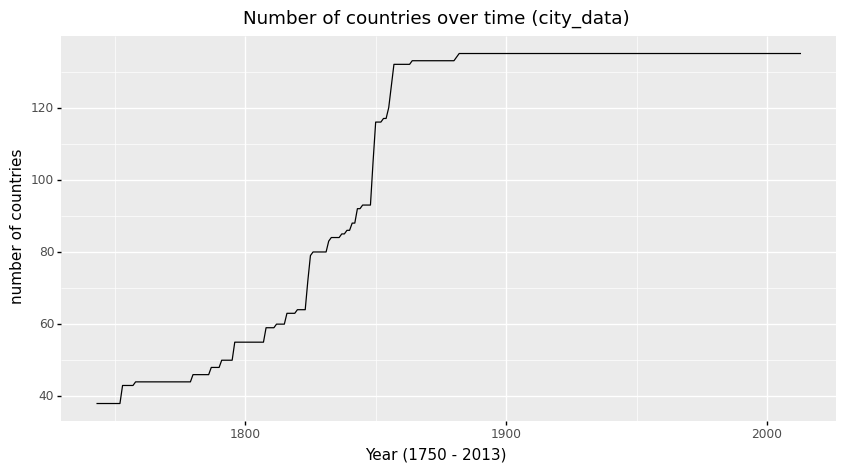

In [14]:
# This plot shows the variation in the numbers of countries that the city_data has in the database.
diff_plot(data_countries,title='Number of countries over time (city_data)', temp_variable = 'number_countries', y = 'number of countries')

We see how the number of countries in city_data has been increasing in the first hundred years and that can cause great volatility in the differences in the global average temperature in that period, but we really do not know how many countries have been considered in the global_data (database). The number of countries in city_data remains constant from 1864 to 2013.

## Check if there is a tendency in the differences between Madrid and Global temperature.

The difference between the Madrid mean temperature (11.45 ºC) and the global mean (8.36 ºC) in all data frame is equal to 3.09. That idea is to make a plot a see how the differences change over time.

In [15]:
# Create a new column (diff_madrid_global) is the difference among madrid_avg_temperature and global_avg temperature
data['diff_madrid_global'] = data['madrid_avg_temperature'] -data['global_avg_temperature']
data.head()

,year,city,madrid_avg_temperature,global_avg_temperature,diff_madrid_temp,diff_global_temp,diff_madrid_global
0,1750,Madrid,12.01,8.72,NaN,NaN,3.29
1,1751,Madrid,12.71,7.98,0.70,-0.74,4.73
2,1752,Madrid,7.07,5.78,-5.64,-2.20,1.29
3,1753,Madrid,11.47,8.39,4.40,2.61,3.08
4,1754,Madrid,11.49,8.47,0.02,0.08,3.02


## Let's make a histogram to see the differences of the temperature.

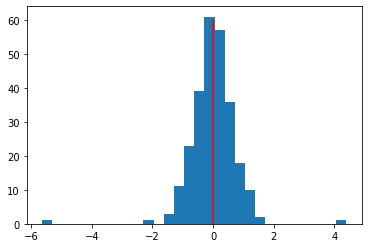

In [41]:
plt.hist(data.diff_madrid_temp.dropna(), bins = 30)
plt.vlines( x =data.diff_madrid_temp.dropna().mean(), ymin=0, ymax=60,
          colors='r');

The histogram is quite normal with the mean around cero.

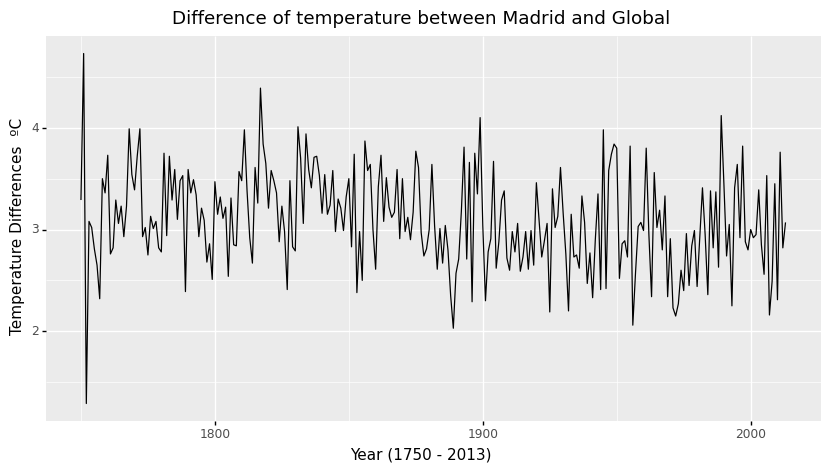

In [16]:
# Plot diff_madrid_global
diff_plot(data,title='Difference of temperature between Madrid and Global', temp_variable = 'diff_madrid_global', 
          y = 'Temperature Differences  ºC') 

The temperature differences between Madrid and the global temperature do not show a clear tendency to increase or decrease over time. We see how it increases and decreases around the mean of differences (3.09 ºC).

## We are going to reshape the data

The idea is to have a column called legend where we have two factors (for example, Madrid avg temperature, global avg temperature) to capture the two together in one plot.

In [17]:
# This function reshape the data frame data changing the columns name to factors 
# in a new column called Leyend to later plot in one graph.

def reshape_data(variable1, variable2):
  '''
  arg:
      variable1 and variable2 ( change columns name for a factors in 
      Leyend colums)
  '''

  data_reshape = pd.melt(data, id_vars='year', 
            value_vars=[variable1, variable2], 
            var_name='Leyend', 
            value_name='temperature')
  return data_reshape


data_reshape = reshape_data('madrid_avg_temperature', 'global_avg_temperature')
print(data_reshape.head())
print(data_reshape.tail())

   year                  Leyend  temperature
0  1750  madrid_avg_temperature        12.01
1  1751  madrid_avg_temperature        12.71
2  1752  madrid_avg_temperature         7.07
3  1753  madrid_avg_temperature        11.47
4  1754  madrid_avg_temperature        11.49
     year                  Leyend  temperature
523  2009  global_avg_temperature         9.51
524  2010  global_avg_temperature         9.70
525  2011  global_avg_temperature         9.52
526  2012  global_avg_temperature         9.51
527  2013  global_avg_temperature         9.61


## We are going to plot all the points of the annual average temperature of Madrid and the global world, together in the same graph with a regression line.

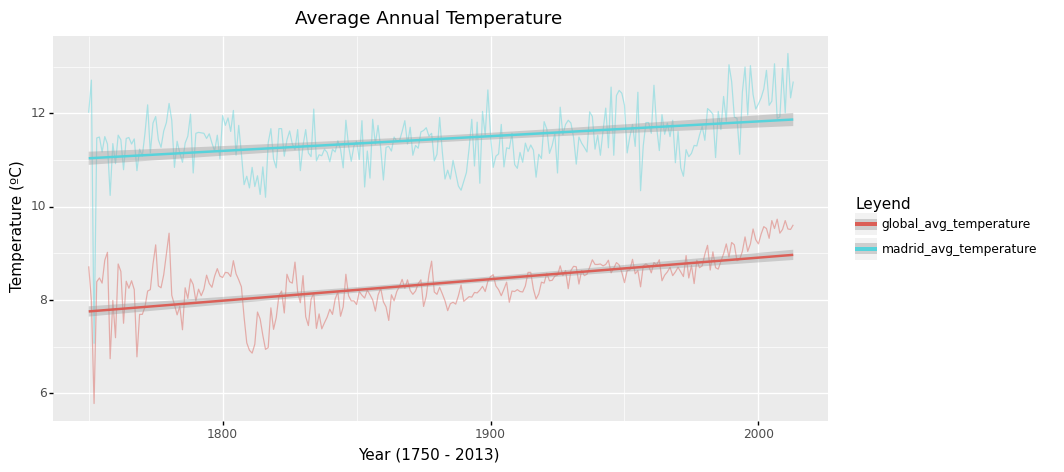

<ggplot: (73665132505)>

In [18]:
(ggplot(data_reshape, aes(x="year", y="temperature", colour = 'Leyend'))
    + ggtitle('Average Annual Temperature')
    +labs (y="Temperature (ºC)", x = "Year (1750 - 2013)")
    + geom_line(alpha = 0.45)+ stat_smooth(method = "lm")
    + theme(figure_size=(10, 5)))

We can see an increase in the average temperature trend over time, both in the city of Madrid as well as in the global average temperature.

## Moving average
- Using the moving average smoothing the data and makes it easier to see the trend in the data. 
- We will calculate the moving average with a window of 10 years.

In [19]:
data['madrid_moving_avg'] =data.madrid_avg_temperature.rolling(10).mean()
data['global_moving_avg'] =data.global_avg_temperature.rolling(10).mean()
data.head()

,year,city,madrid_avg_temperature,global_avg_temperature,diff_madrid_temp,diff_global_temp,diff_madrid_global,madrid_moving_avg,global_moving_avg
0,1750,Madrid,12.01,8.72,NaN,NaN,3.29,NaN,NaN
1,1751,Madrid,12.71,7.98,0.70,-0.74,4.73,NaN,NaN
2,1752,Madrid,7.07,5.78,-5.64,-2.20,1.29,NaN,NaN
3,1753,Madrid,11.47,8.39,4.40,2.61,3.08,NaN,NaN
4,1754,Madrid,11.49,8.47,0.02,0.08,3.02,NaN,NaN


In [20]:
# We are using the moving average values to make a new plot and before that, we reshape the data changing the moving average 
# variable as a factor in a Legend column.
data_reshape = reshape_data('madrid_moving_avg', 'global_moving_avg')
print(data_reshape.head())
print(data_reshape.tail())

   year             Leyend  temperature
0  1750  madrid_moving_avg          NaN
1  1751  madrid_moving_avg          NaN
2  1752  madrid_moving_avg          NaN
3  1753  madrid_moving_avg          NaN
4  1754  madrid_moving_avg          NaN
     year             Leyend  temperature
523  2009  global_moving_avg        9.493
524  2010  global_moving_avg        9.543
525  2011  global_moving_avg        9.554
526  2012  global_moving_avg        9.548
527  2013  global_moving_avg        9.556


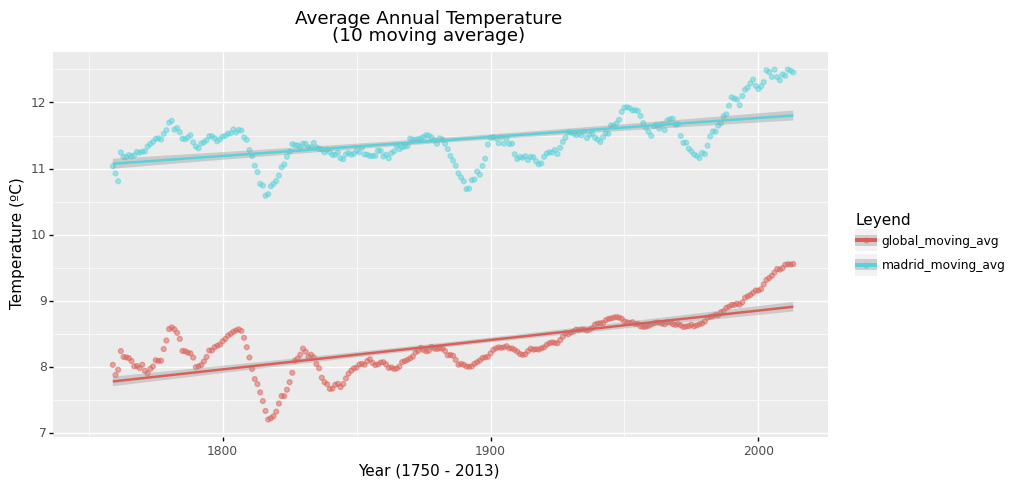

<ggplot: (73665095226)>

In [21]:
(ggplot(data_reshape, aes(x="year", y="temperature", colour = 'Leyend'))
    + ggtitle('Average Annual Temperature\n(10 moving average)')
    +labs (y="Temperature (ºC)", x = "Year (1750 - 2013)")
    + geom_point(alpha = 0.50)+ stat_smooth(method = "lm") 
    + theme(figure_size=(10, 5)))

Now the plot shows a more clear increase in the temperature average tendency in Madrid as well in the global world. The slope of the regression line is higher in the global world than in Madrid.

In [22]:
# Correlation between Madrid and global temperatures
data[['madrid_avg_temperature', 'global_avg_temperature']].corr(method='pearson')

,madrid_avg_temperature,global_avg_temperature
madrid_avg_temperature,1.000000,0.684226
global_avg_temperature,0.684226,1.000000


The correlation coefficient is 0.68 (moderately strong), maybe is not possible to estimate with enough precision Madrid temperature based on global average temperature.

## Conclusion

- The average temperature of Madrid is 3.09 degrees Celsius higher than the global average temperature.
-  In 1752 the lowest temperatures were recorded both in Madrid (7.07 ºC) and in the global temperature (5.78) with a difference of 38% about the mean of all the data.
- Between 2010 and 2013 the highest temperatures of the series were recorded both in Madrid (12.49 ºC) and in the global temperature (9.56).
- The temperature differences between Madrid and the global temperature vary above and below the mean difference (3.09 ºC) over time, but in a somewhat random way.
- There is greater volatility in the global temperature in the period between 1750 and 1850, while the volatility of the temperature of Madrid remains more constant throughout the entire series. There is no conclusive explanation for this, perhaps it is because in that period the global temperature database included fewer countries, as the "Number of Countries Over Time" graph shows, or perhaps the Mediterranean climate of Madrid was seen less affected by those fluctuations.
- charts made with a moving average are very similar. There is a period between 1810 and 1820 that the average temperatures suffer a decrease both in Madrid and worldwide, that period coincides with the climatic period in which Europe and Asia cooled down.
- We see a peak around 1830 and this coincides with the industrial revolution, closely linked to the extraction and use of coal.

- There is an overall uptrend in the global temperature and Madrid temperature, indicating global warming.
- Since 1900 the global temperature has been increasing and we see how since the 1970s the slope of the temperature curve both in Madrid and in the global temperature has increased markedly, which indicates that global warming is accelerating. 